Винников Степан
ИУ5-62Б
РК№2 Вариант 9

In [41]:
# Импорт библиотек

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [42]:
# Загрузка датасета
data = pd.read_csv("houses_to_rent_v2.csv")

In [43]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [45]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [46]:
data = data[data['total (R$)'] <= 10000]

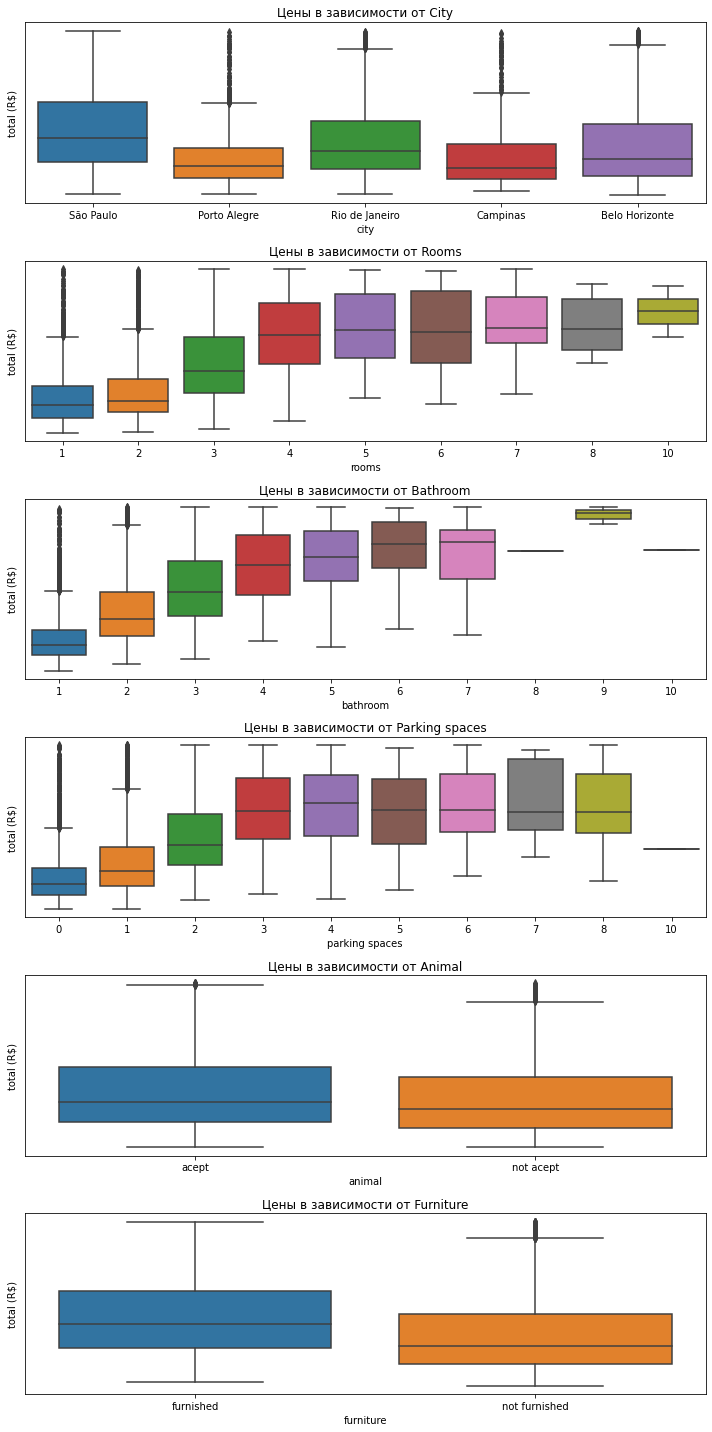

In [47]:
cols = data.columns
cols = list(cols)
cols.remove('area')
cols.remove('floor')

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 20), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    col = cols[i]
    sns.boxplot(x=col,y='total (R$)', data = data, ax = ax)
    ax.set_title(f"Цены в зависимости от {col.capitalize()}")
plt.tight_layout()
plt.show()

In [48]:
# Удаляем ненужные колонки
data = data.drop(['hoa (R$)', 'rent amount (R$)','property tax (R$)', 'fire insurance (R$)'], axis = 1)

In [49]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [50]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,total (R$)
0,4,70,2,1,1,30,0,0,5618
1,4,320,4,4,0,13,0,1,7973
2,2,80,1,1,1,29,0,1,3841
3,2,51,2,1,0,12,0,1,1421
4,4,25,1,1,0,1,1,1,836


<AxesSubplot:>

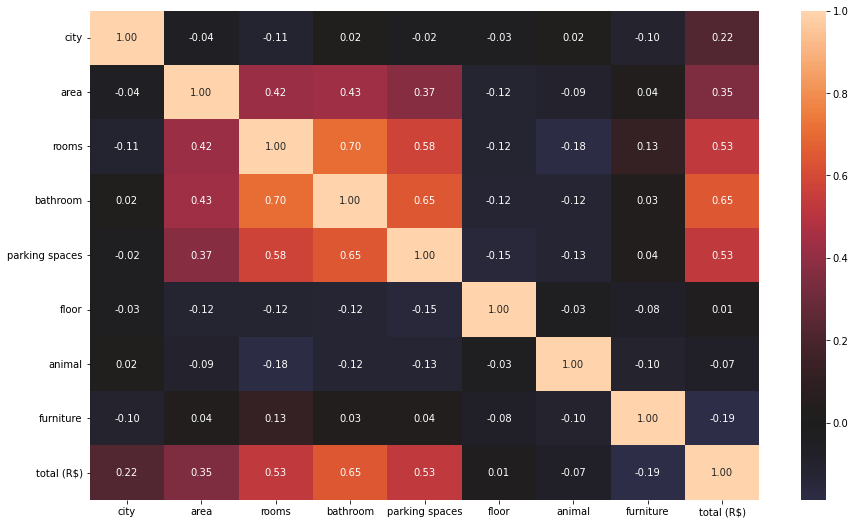

In [51]:
# Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

In [52]:
# Разделение выборки на обучающую и тестовую
target = "total (R$)"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

In [53]:
# Линейная регрессия
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

In [54]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [55]:
print("Качество модели по коэф. дет.: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Качество модели по коэф. дет.: 0.5751195955306787
Корень из средней квадратичной ошибки: 2188850.908367666


In [56]:
# Случайный лес
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [57]:
R2_RT = r2_score(testY, RT.predict(testX))

In [58]:
RMSE_RT= mean_squared_error(testY, RT.predict(testX), squared=True)

In [59]:
print("Качество модели по коэф. дет.: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Качество модели по коэф. дет.: 0.6358583585661002
Корень из средней квадратичной ошибки: 1875943.804992861
